In [ ]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df_2023 = pd.read_excel('/content/drive/MyDrive/tour/data/elsx/2023 외래관광객조사 DATA.xlsx')
df_2024 = pd.read_excel('/content/drive/MyDrive/tour/data/elsx/2024 외래관광객조사_Data.xlsx')

In [ ]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2023~2024

In [ ]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [ ]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


In [ ]:
# df_2023.drop(columns=['방문지역'], inplace=True)
# df_2024.drop(columns=['방문지역'], inplace=True)

In [ ]:
import pandas as pd

# 1. 지역 컬럼 정의
region_cols = [f"Q9_2a{str(i).zfill(2)}" for i in range(1, 18)]

# 2. 지역 코드 → 지역명 매핑
region_map = {
    1: "서울", 2: "경기", 3: "인천", 4: "강원", 5: "대전",
    6: "충북", 7: "충남", 8: "세종", 9: "경북", 10: "경남",
    11: "대구", 12: "울산", 13: "부산", 14: "광주", 15: "전북",
    16: "전남", 17: "제주"
}

# 3. 지역 리스트 추출 함수 (수정 버전)
def extract_visited_regions(row):
    visited = []
    for col in region_cols:
        val = row.get(col)
        if pd.notna(val):
            try:
                code = int(val)
                region = region_map.get(code)
                if region and region not in visited:
                    visited.append(region)
            except:
                continue
    return visited

# 4. 적용
df_2023["방문지역"] = df_2023.apply(extract_visited_regions, axis=1)
df_2024["방문지역"] = df_2024.apply(extract_visited_regions, axis=1)

# 5. 확인
print(df_2023[["pnid", "방문지역"]].head(10))
print(df_2024[["pnid", "방문지역"]].head(10))

   pnid          방문지역
0     6      [서울, 강원]
1     7          [서울]
2     8          [인천]
3    10          [서울]
4    11      [서울, 인천]
5    12          [서울]
6    14      [서울, 강원]
7    16          [경기]
8    19  [서울, 강원, 부산]
9    20      [서울, 강원]
   pnid      방문지역
0    57      [서울]
1    58      [서울]
2    59      [서울]
3    60      [서울]
4    61  [서울, 경기]
5    63  [서울, 경기]
6    64  [서울, 경기]
7    66      [서울]
8    68      [서울]
9    69      [서울]


In [ ]:
# 클러스터1 국가 리스트
cluster1_countries = ["미국", "영국", "독일", "프랑스", "캐나다", "호주", "기타"]

# 공통 국가 필터링 함수
def filter_cluster1(df):
    return df[df["국가명"].isin(cluster1_countries)].copy()

# 연도별 필터링
df_cluster1_2023 = filter_cluster1(df_2023)
df_cluster1_2024 = filter_cluster1(df_2024)

- 계절 컬럼 추가 (계절 분석 시 사용)

In [ ]:
import pandas as pd

# 월 → 계절 매핑 함수
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:  # 12, 1, 2
        return 'Winter'

# 각 연도별 데이터프레임에 적용
# for df in [df_cluster1_2024, df_cluster1_2023, df_cluster1_2022]:
#     df['계절'] = df['D_MON'].apply(month_to_season)

for df in [df_cluster1_2024, df_cluster1_2023]:
    df['계절'] = df['D_MON'].apply(month_to_season)

- 활동 만족도 매핑 코드

In [ ]:
# 1. 활동 코드 → 활동명 매핑
q12_2023_item_mapping = {
    "Q12a01": "식도락(음식)",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "고궁/역사 유적지 방문",
    "Q12a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "Q12a06": "박물관, 전시관 관람",
    "Q12a07": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a09": "지역 축제 참여",
    "Q12a10": "유흥(나이트라이프 활동 및 카지노 등)",
    "Q12a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q12a12": "뷰티/미용 관광 (마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a13": "치료/건강검진(피부과, 성형외과, 내‧외과 입원, 수술 등)",
    "Q12a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a15": "스포츠/레포츠 참가(스키, 수영, 골프, 캠핑 등)"
}

# 2. 매핑 함수
def extract_activity_satisfaction_2023(row):
    satisfaction_dict = {}
    for col, activity_name in q12_2023_item_mapping.items():
        if col in row and pd.notna(row[col]):
            score = row[col]
            if isinstance(score, (int, float)) and 1 <= score <= 5:
                satisfaction_dict[activity_name] = score
    return satisfaction_dict

# 3. 적용
df_cluster1_2023["활동만족도"] = df_cluster1_2023.apply(extract_activity_satisfaction_2023, axis=1)

In [ ]:
# 1. 활동 코드 → 활동명 매핑
q12_2024_item_mapping = {
    "Q12a01": "식도락(음식/미식) 관광",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "휴양/휴식(웰니스)",
    "Q12a05": "고궁/역사 유적지 방문",
    "Q12a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q12a07": "박물관, 전시관 관람",
    "Q12a08": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a09": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a10": "지역 축제 참여",
    "Q12a11": "유흥(나이트라이프 활동 및 카지노)",
    "Q12a12": "오락(놀이공원 및 테마파크 방문 등",
    "Q12a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q12a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)",
}

# 2. 매핑 함수
def extract_activity_satisfaction_2024(row):
    satisfaction_dict = {}
    for col, activity_name in q12_2024_item_mapping.items():
        if col in row and pd.notna(row[col]):
            score = row[col]
            if isinstance(score, (int, float)) and 1 <= score <= 5:
                satisfaction_dict[activity_name] = score
    return satisfaction_dict

# 3. 적용
df_cluster1_2024["활동만족도"] = df_cluster1_2024.apply(extract_activity_satisfaction_2024, axis=1)

# 서울 제외 + 활동별 만족도 높은 지역 TOP5 추출

연관 분석에서 나온 활동

- 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)
- 고궁/역사 유적지 방문
- 박물관, 전시관 관람
- 자연경관 감상
- 식도락(음식/미식) 관광
- 쇼핑

In [ ]:
# 활동명 리스트 (2023, 2024 혼용 대비 포함)
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# TOP5 추출 함수
def extract_top5_regions(df, activity_name):
    rows = []

    for _, row in df.iterrows():
        if activity_name in row.get("활동만족도", {}) and isinstance(row.get("방문지역", []), list):
            score = row["활동만족도"][activity_name]
            weight = row.get("weight", 1)
            for region in row["방문지역"]:
                if region != "서울":
                    rows.append({
                        "region": region,
                        "score": score,
                        "weight": weight
                    })

    region_df = pd.DataFrame(rows)

    if region_df.empty:
        return pd.DataFrame(columns=["region", "weighted_mean"])

    # 가중 평균 계산
    result = region_df.groupby("region").apply(
        lambda x: (x["score"] * x["weight"]).sum() / x["weight"].sum()
    ).reset_index(name="weighted_mean")

    # 상위 5개 추출
    top5 = result.sort_values(by="weighted_mean", ascending=False).head(5)
    return top5

# 사용
for activity in target_activities:
    print(f"\n[2023] {activity}")
    display(extract_top5_regions(df_cluster1_2023, activity))

    print(f"\n[2024] {activity}")
    display(extract_top5_regions(df_cluster1_2024, activity))



[2023] 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
8,세종,4.885176
14,충남,4.788340
1,경기,4.730498
3,경북,4.726867
10,인천,4.719335



[2024] 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)


,region,weighted_mean



[2023] 고궁/역사 유적지 방문


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
3,경북,4.887813
9,울산,4.864068
2,경남,4.831557
11,전남,4.819289
14,충남,4.796136



[2024] 고궁/역사 유적지 방문


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
5,대구,4.850040
11,전남,4.826619
10,인천,4.789105
3,경북,4.783998
2,경남,4.774665



[2023] 박물관, 전시관 관람


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
6,대전,4.868428
12,전북,4.835955
8,세종,4.825091
11,전남,4.748051
14,충남,4.726340



[2024] 박물관, 전시관 관람


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
11,전남,4.931324
0,강원,4.715650
14,충남,4.692815
3,경북,4.645970
1,경기,4.591794



[2023] 자연경관 감상


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
14,충남,4.955245
11,전남,4.896798
12,전북,4.858308
3,경북,4.801124
4,광주,4.785059



[2024] 자연경관 감상


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
11,전남,4.967052
9,울산,4.836546
10,인천,4.820824
0,강원,4.811608
4,광주,4.802472



[2023] 식도락(음식/미식) 관광


,region,weighted_mean



[2024] 식도락(음식/미식) 관광


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
5,대구,4.772461
0,강원,4.685227
10,인천,4.661254
15,충북,4.653507
6,대전,4.646204



[2023] 쇼핑


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
8,세종,4.802463
14,충남,4.762755
15,충북,4.688550
12,전북,4.623616
1,경기,4.607691



[2024] 쇼핑


/tmp/ipython-input-15-2959456974.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
14,충남,4.825261
10,인천,4.597281
11,전남,4.576616
0,강원,4.572000
1,경기,4.558697


/tmp/ipython-input-16-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


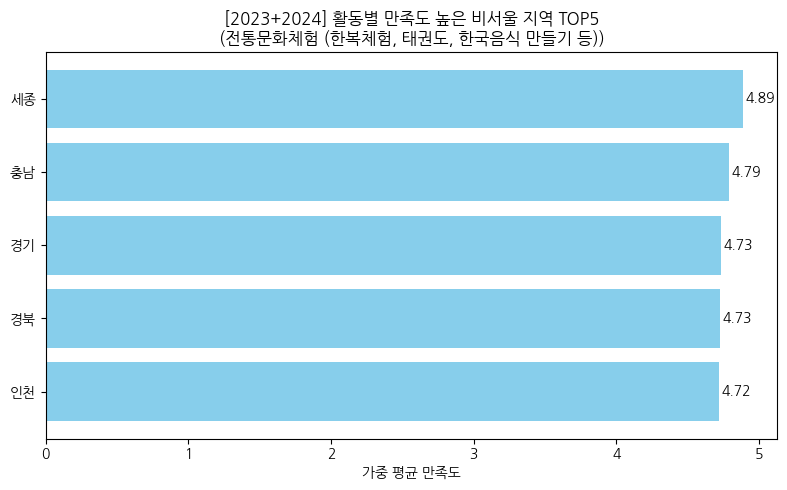

/tmp/ipython-input-16-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


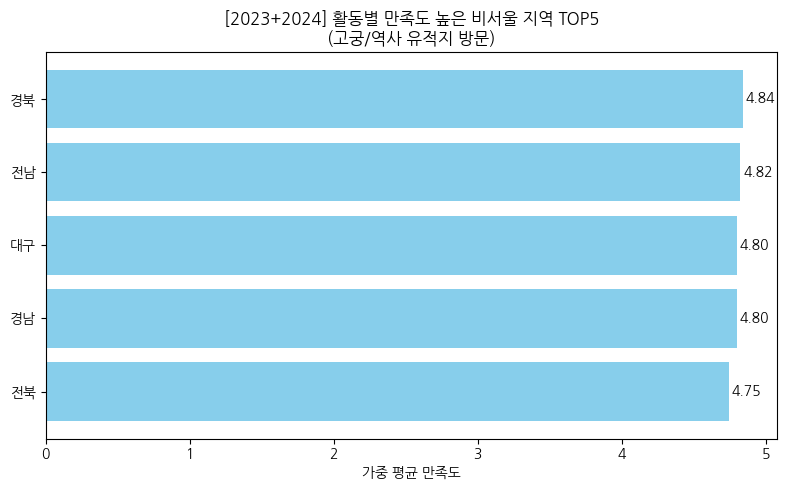

/tmp/ipython-input-16-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


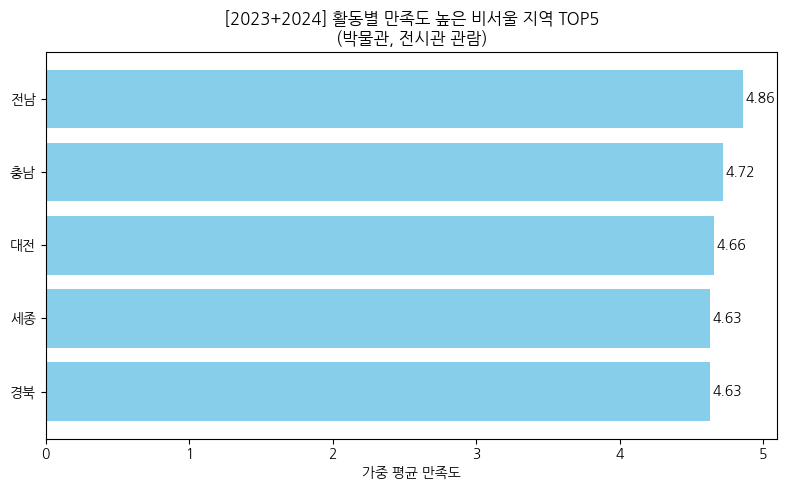

/tmp/ipython-input-16-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


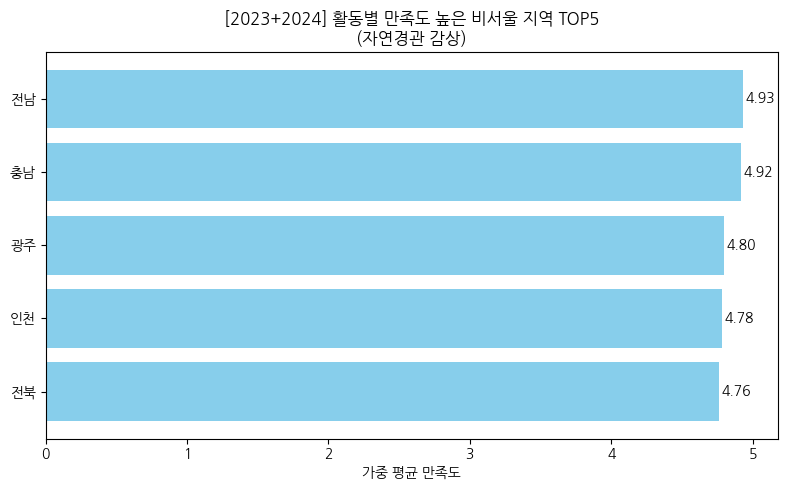

/tmp/ipython-input-16-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


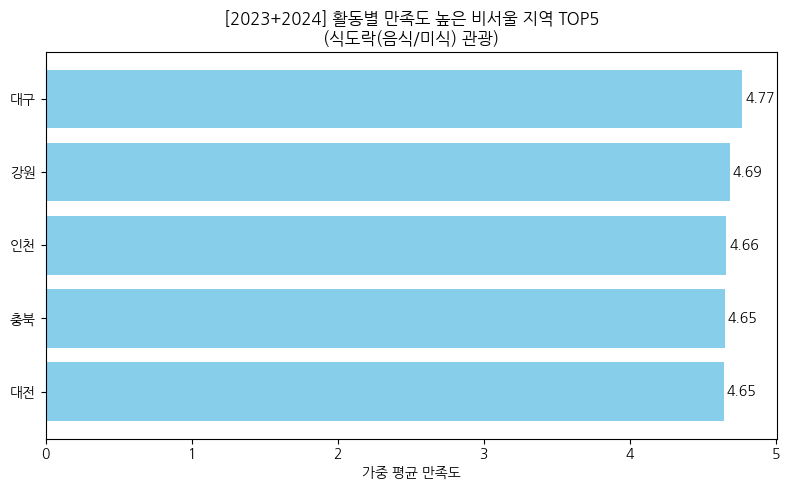

/tmp/ipython-input-16-4276491972.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


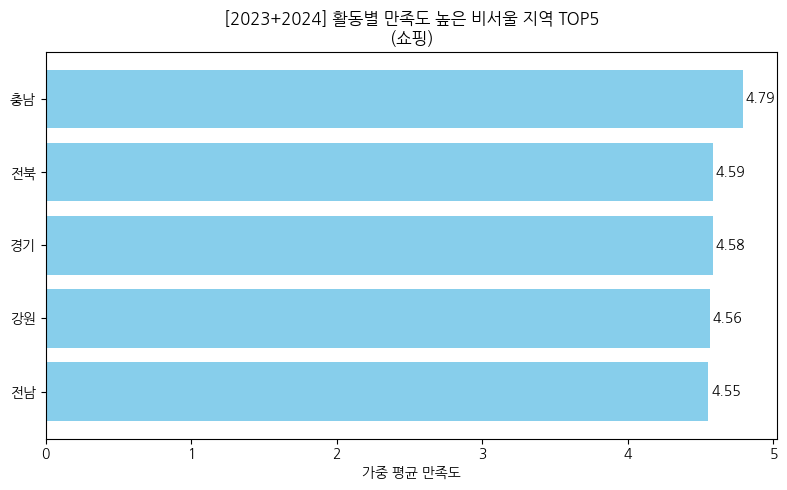

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 활동 리스트
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2023, 2024 필요한 컬럼만 추출 후 병합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# TOP5 지역 추출 함수
def extract_top5_regions(df, activity_name):
    rows = []
    for _, row in df.iterrows():
        if activity_name in row.get("활동만족도", {}) and isinstance(row.get("방문지역", []), list):
            score = row["활동만족도"][activity_name]
            weight = row.get("weight", 1)
            for region in row["방문지역"]:
                if region != "서울":
                    rows.append({"region": region, "score": score, "weight": weight})
    region_df = pd.DataFrame(rows)
    if region_df.empty:
        return pd.DataFrame(columns=["region", "weighted_mean"])
    result = region_df.groupby("region").apply(
        lambda x: (x["score"] * x["weight"]).sum() / x["weight"].sum()
    ).reset_index(name="weighted_mean")
    return result.sort_values(by="weighted_mean", ascending=False).head(5)

# 시각화 with 수치 표시
for activity in target_activities:
    top5_df = extract_top5_regions(df_combined, activity)

    plt.figure(figsize=(8, 5))
    bars = plt.barh(top5_df["region"], top5_df["weighted_mean"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(f"[2023+2024] 활동별 만족도 높은 비서울 지역 TOP5\n({activity})")
    plt.xlabel("가중 평균 만족도")

    # 바 안에 수치 표시
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                 f"{width:.2f}", va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()

## 누적그래프

/tmp/ipython-input-17-1906106809.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot = df_expanded.groupby(['region', 'activity']).apply(


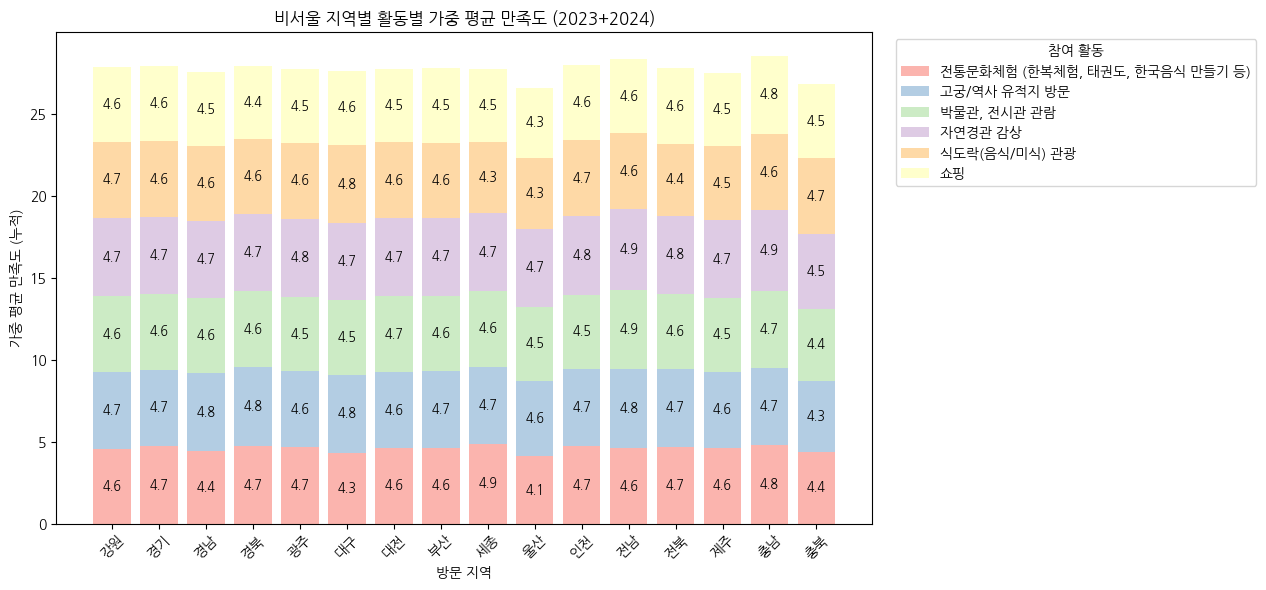

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 활동 리스트 정의
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2. 2023, 2024 데이터에서 필요한 컬럼만 추출 후 결합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# 3. 활동-지역 데이터 펼치기
rows = []
for _, row in df_combined.iterrows():
    act_dict = row.get("활동만족도", {})
    regions = row.get("방문지역", [])
    weight = row.get("weight", 1)
    if isinstance(act_dict, dict) and isinstance(regions, list):
        for region in regions:
            if region != "서울":
                for act in target_activities:
                    if act in act_dict:
                        rows.append({
                            "region": region,
                            "activity": act,
                            "score": act_dict[act],
                            "weight": weight
                        })

df_expanded = pd.DataFrame(rows)

# 4. 지역-활동별 가중 평균 계산
pivot = df_expanded.groupby(['region', 'activity']).apply(
    lambda x: (x['score'] * x['weight']).sum() / x['weight'].sum()
).reset_index(name='weighted_mean')

# 5. 피벗 테이블 생성 (index=activity, columns=region)
pivot_table = pivot.pivot(index='activity', columns='region', values='weighted_mean').fillna(0)

# 6. 색상: 파스텔 컬러 사용
import matplotlib.cm as cm
colors = cm.Pastel1.colors  # 9가지 파스텔 컬러

# 7. 시각화 (세로 스택형 누적 막대그래프)
plt.figure(figsize=(max(10, len(pivot_table.columns) * 0.8), 6))
bottom = [0] * len(pivot_table.columns)
regions = pivot_table.columns.tolist()

for i, activity in enumerate(target_activities):
    values = pivot_table.loc[activity].values
    bars = plt.bar(regions, values, bottom=bottom, label=activity, color=colors[i % len(colors)])

    # 스택 내 수치 출력
    for j, (val, btm) in enumerate(zip(values, bottom)):
        if val > 0.3:
            plt.text(j, btm + val / 2, f"{val:.1f}", ha='center', va='center', fontsize=9, color='black')

    # 다음 스택 누적을 위해 bottom 업데이트
    bottom = [btm + val for btm, val in zip(bottom, values)]

plt.title("비서울 지역별 활동별 가중 평균 만족도 (2023+2024)")
plt.ylabel("가중 평균 만족도 (누적)")
plt.xlabel("방문 지역")
plt.xticks(rotation=45)
plt.legend(title="참여 활동", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 경남


In [ ]:
# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 만족활동 컬럼이 실제로 존재하고, 값이 리스트인지 확인
print("만족활동 타입:", df_all["만족활동"].apply(type).value_counts())

# 포함된 모든 고유 활동명을 확인해보자
unique_activities = set()
for acts in df_all["만족활동"]:
    if isinstance(acts, list):
        unique_activities.update(acts)

print("만족활동에 실제 들어 있는 값들:\n", unique_activities)


만족활동 타입: 만족활동
<class 'list'>    8450
Name: count, dtype: int64
만족활동에 실제 들어 있는 값들:
 {'K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문', '스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)', '뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)', '치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)', '기타', '연수, 교육, 연구', '유흥(나이트라이프 활동 및 카지노)', '전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)', '연극, 뮤지컬, 발레 등 공연 관람', '지역 축제 참여', '휴양/휴식(웰니스)', '국제회의(컨벤션, 국제회의, 전시 등)', '오락(놀이공원 및 테마파크 방문 등)', '치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)', '유흥(나이트라이프 활동 및 카지노 등)', '비즈니스 전문활동(업무회의, 산업시설 시찰 등)', '전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)', '식도락(음식/미식) 관광', '자연경관 감상', '쇼핑', '고궁/역사 유적지 방문', '스포츠/레포츠 관람 (야구, 축구, 농구 등)', '박물관, 전시관 관람'}


In [ ]:
region_set = set()
for regions in df_all["방문지역"]:
    if isinstance(regions, list):
        region_set.update(regions)

print("방문지역 리스트에 있는 지역들:\n", region_set)


방문지역 리스트에 있는 지역들:
 {'울산', '인천', '충북', '광주', '전남', '경남', '경북', '부산', '충남', '경기', '서울', '제주', '전북', '대구', '대전', '세종', '강원'}


In [ ]:
def contains_경남(region_list):
    return any(isinstance(val, str) and ('경남' in val or '경상남도' in val) for val in region_list)

# 조건 1: 고궁/역사 유적지 방문 활동 포함
cond1 = df_all["만족활동"].apply(lambda x: isinstance(x, list) and "고궁/역사 유적지 방문" in x)
print("조건1 - 고궁 활동 만족자 수:", cond1.sum())

# 조건 2: 경남 또는 경상남도 방문자
cond2 = df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_경남(x))
print("조건2 - 경남 방문자 수:", cond2.sum())

# 최종 AND 조건
final = df_all[cond1 & cond2]
print("🎯 최종 조건 만족 응답자 수:", len(final))


조건1 - 고궁 활동 만족자 수: 3513
조건2 - 경남 방문자 수: 139
🎯 최종 조건 만족 응답자 수: 34


In [ ]:
# 최종 조건 만족자 34명 확인
final = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and "고궁/역사 유적지 방문" in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_경남(x))
]

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']

# Q9_1_1~Q9_1_5 값 확인
print("각 Q9_1_x 컬럼 값 샘플:")
for col in satisfied_cols:
    print(col, ":", final[col].dropna().unique())

각 Q9_1_x 컬럼 값 샘플:
Q9_1_1 : [50500 48509 26500 48511 48301 47054 48503 48501 47051 29500 11012 11910
 26513 48516 48009 41530 48001 47031 11005 11001 42002 48514 44504 26501
 11002 45001 41003]
Q9_1_2 : [11012. 47032. 11002. 11513.]
Q9_1_3 : [26006. 45502.]
Q9_1_4 : []
Q9_1_5 : []


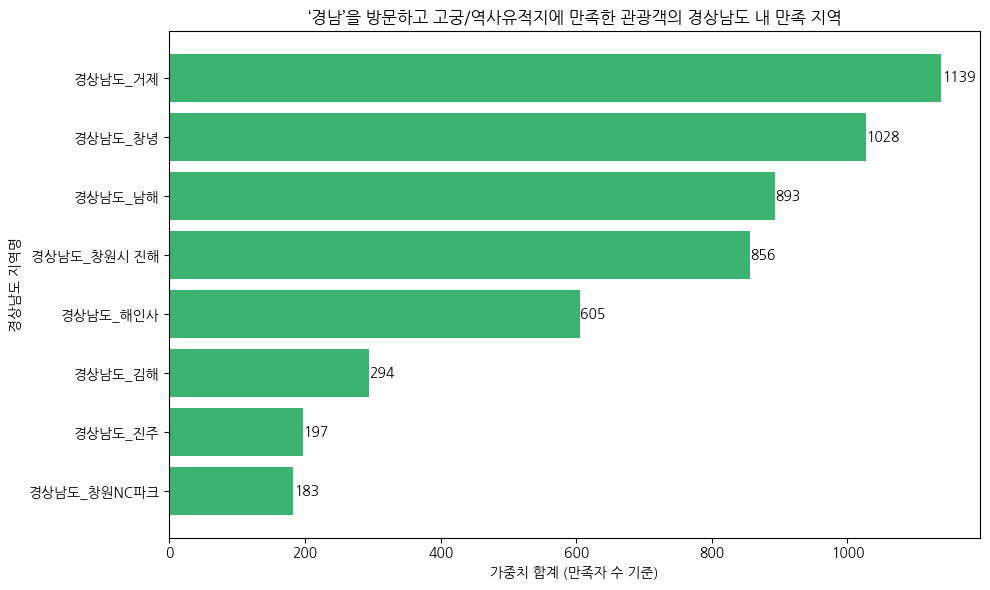

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "고궁/역사 유적지 방문"

# 경상남도 지역코드 매핑
gyeongnam_code_map = {
    48501: "경상남도_거제",
    48502: "경상남도_양산시",
    48503: "경상남도_진주",
    48504: "경상남도_창원",
    48505: "경상남도_통영",
    48507: "경상남도_밀양",
    48508: "경상남도_사천",
    48509: "경상남도_남해",
    48510: "경상남도_함안",
    48511: "경상남도_창원시 진해",
    48512: "경상남도_창원시 마산합포구",
    48513: "경상남도_하동군",
    48514: "경상남도_김해",
    48515: "경상남도_합천군",
    48516: "경상남도_창녕",
    48517: "경상남도_산청군",
    48518: "경상남도_거창군",
    48519: "경상남도_고성군",
    48520: "경상남도_함양",
    48001: "경상남도_해인사",  # 관광지로 포함된 경남 코드
    48009: "경상남도_창원NC파크",
    48004: "경상남도_외도"
}

# 지역코드 set
gyeongnam_codes = set(gyeongnam_code_map.keys())

# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 조건 필터: 만족활동에 고궁/역사유적지 포함 + 방문지역에 '경남' 포함
def contains_경남(region_list):
    return any(isinstance(val, str) and ('경남' in val or '경상남도' in val) for val in region_list)

filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_경남(x))
]

# rows 생성: 만족한 지역 중 '경상남도' 코드에 해당하는 경우만 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))  # float형도 안전하게 int로 변환
            if val in gyeongnam_codes:
                rows.append((val, weight))
        except:
            continue

# 데이터프레임으로 집계
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)

# 코드 → 지역명으로 매핑
region_score_named = region_score.rename(index=gyeongnam_code_map)

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(region_score_named.index, region_score_named.values, color="mediumseagreen")
plt.gca().invert_yaxis()
plt.title("‘경남’을 방문하고 고궁/역사유적지에 만족한 관광객의 경상남도 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("경상남도 지역명")

# 수치 표시
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

| 지역명          | 고궁/역사유적지 관련성                  |
| ------------ | ----------------------------- |
| 경상남도\_거제     | ❓ 낮음 (자연경관/휴양 위주)             |
| 경상남도\_창녕     | ✅ 높음 (화왕산성, 도항리 고분군, 비화가야 고분) |
| 경상남도\_남해     | ❓ 자연경관 중심 (다랭이마을, 독일마을)       |
| 경상남도\_창원시 진해 | ❓ 벚꽃/군항제 등 계절성 테마             |
| 경상남도\_해인사    | ✅ 매우 높음 (팔만대장경, 세계유산)         |
| 경상남도\_김해     | ✅ 높음 (가야 유적지 중심)              |
| 경상남도\_진주     | ✅ 높음 (진주성, 논개, 임진왜란 유적지)      |
| 경상남도\_창원NC파크 | ❌ 없음 (야구장)                    |

# 전남 - 박물관

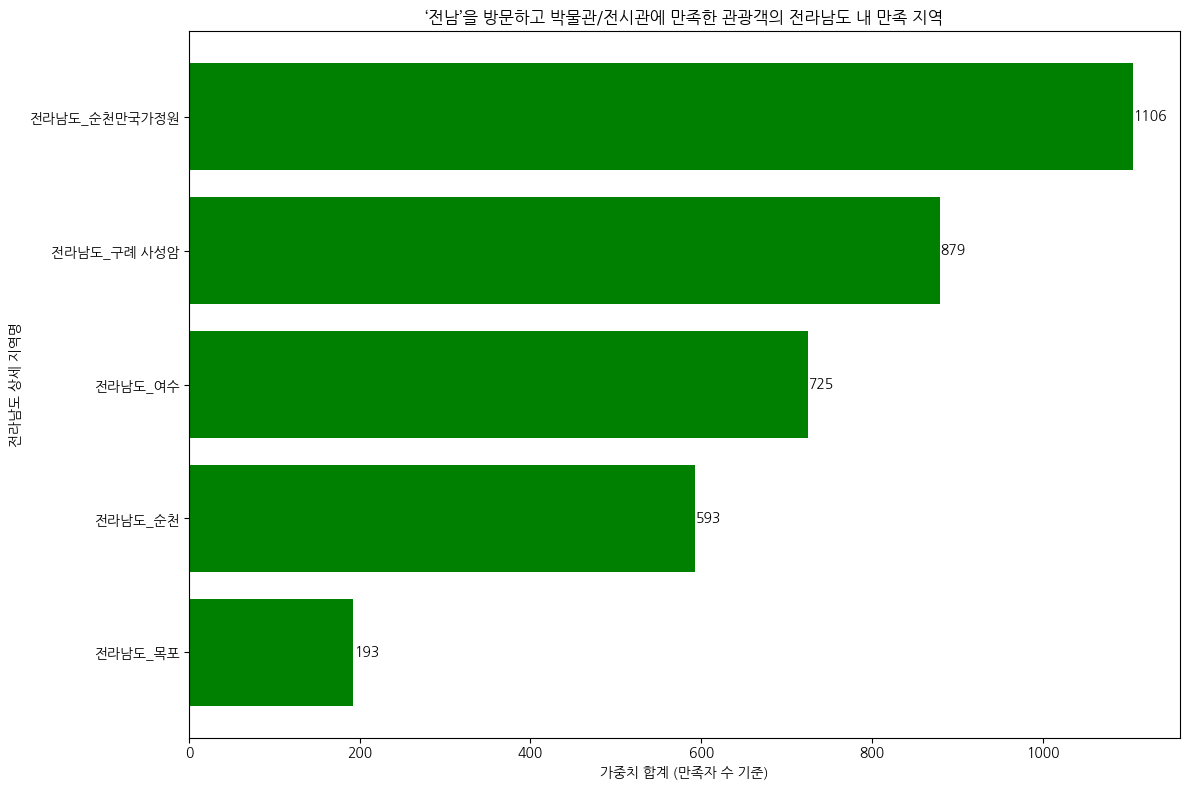

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "박물관, 전시관 관람"

# 전라남도 지역 코드-지명 매핑
jeonnam_code_map = {
    46001: "전라남도_신안 퍼플섬(박지도)",
    46002: "전라남도_대한다원보성녹차밭",
    46003: "전라남도_순천만국가정원",
    46004: "전라남도_소노캄 여수",
    46005: "전라남도_순천만국제정원박람회",
    46006: "전라남도_영암월출산",
    46301: "전라남도_광양매화축제",
    46020: "전라남도_진도 신비의바닷길",
    46031: "전라남도_순천 송광사",
    46041: "전라남도_목포 유달산",
    46051: "전라남도_구례 사성암",
    46052: "전라남도_순천만국가정원",
    46071: "전라남도_여수 유월드 루지테마파크",
    46501: "전라남도_목포",
    46502: "전라남도_여수",
    46503: "전라남도_고흥",
    46504: "전라남도_구례",
    46505: "전라남도_나주",
    46506: "전라남도_곡성",
    46507: "전라남도_담양",
    46508: "전라남도_순천",
    46509: "전라남도_진도",
    46510: "전라남도_영천",
    46511: "전라남도_광양",
    46512: "전라남도_보성군",
    46513: "전라남도_신안군",
    46514: "전라남도_함평군",
    46515: "전라남도_무안군",
    46901: "전라남도_맛집/카페/주점",
    46902: "전라남도_숙박시설(호텔,팬션,캠핑)",
    46903: "전라남도_쇼핑시설(백화점,마트,면세점)",
    46904: "전라남도_전통시장",
    46905: "전라남도_체험마을(한옥,농원,꽃)",
    46906: "전라남도_종교시설(사찰,교회)",
    46907: "전라남도_교육기관(학교,학원)",
    46908: "전라남도_뷰티,스파시설(미용,마사지,스파,찜질방)",
    46909: "전라남도_오락시설(노래방,PC방,카지노)",
    46910: "전라남도_유적지/문화재",
    46911: "전라남도_바다(해수욕장,항구)",
    46912: "전라남도_역/터미널/공항",
    46913: "전라남도_동물원/식물원/아쿠아리움",
    46914: "전라남도_놀이시설/테마공원",
    46915: "전라남도_문화시설(영화관 등)",
    46916: "전라남도_전시관/박물관/미술관",
    46917: "전라남도_레져스포츠(스키,낚시,등산)",
    46918: "전라남도_관공서(시청,군청 등)",
    46919: "전라남도_공연장/팬미팅",
    46920: "전라남도_공원/수목원/휴양림/유원지"
    }

# 지역코드 set
jeonnam_codes = set(jeonnam_code_map.keys())

# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 조건 필터: 만족활동에 타깃 활동 포함 + 방문지역에 '전남' 포함
def contains_전남(region_list):
    return any(isinstance(val, str) and ('전남' in val or '전라남도' in val) for val in region_list)

filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_전남(x))
]

# rows 생성: 만족한 지역 중 '전라남도' 코드에 해당하는 경우만 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in jeonnam_codes:
                rows.append((val, weight))
        except:
            continue

# 집계
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)

# 코드 → 지역명으로 매핑
region_score_named = region_score.rename(index=jeonnam_code_map)

# 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(region_score_named.index, region_score_named.values, color="green")
plt.gca().invert_yaxis()
plt.title("‘전남’을 방문하고 박물관/전시관에 만족한 관광객의 전라남도 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("전라남도 상세 지역명")

# 수치 표시
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# 필터된 데이터에서 만족 지역 코드 전체 수집
codes = []
for _, row in filtered.iterrows():
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            codes.append(val)
        except:
            continue

# 가장 많이 나온 코드 Top 10
Counter(codes).most_common(10)

[(45502, 1),
 (46508, 1),
 (47051, 1),
 (46502, 1),
 (45505, 1),
 (46003, 1),
 (11079, 1),
 (45511, 1),
 (11045, 1),
 (46051, 1)]

| 지역명 | 박물관/전시관 수 및 대표 시설 | 관광코스 포함 여부 | 관련성 종합 평가 |
| --- | --- | --- | --- |
| **구례 사성암 (구례군)** | 🔹 한국압화박물관<br>🔹 식물표본전시관<br>🔹 운조루 유물전시관 등 | ◽️ 부가적 포함 <br>(주요 코스 아님) | ⚪ **보통**<br>- 자연관광이 주력이며 박물관은 부가적 |
| **여수** | 🔹 아르떼뮤지엄<br>🔹 해양수산과학관<br>🔹 하멜전시관<br>🔹 엑스포기념관 | ✅ 공식코스 포함<br>(엑스포공원 일대 집중) | 🟢 **높음**<br>- 실제 여행 루트에 포함 빈도 높음 |
| **순천** | 🔹 뿌리깊은나무박물관<br>🔹 순천만생태전시관<br>🔹 기독교역사박물관 등 | ◽️ 일부 코스에 포함<br>(통합권에 포함됨) | 🟡 **중간**<br>- 주된 관광은 자연+전통, 전시관은 보완적 |
| **목포** | 🔹 목포자연사박물관<br>🔹 해양유물전시관<br>🔹 문학관·근대역사관<br>🔹 노벨평화상기념관 등 <br>7곳 이상 밀집 | ✅ 공식 테마코스 중심<br>(갓바위 문화타운 중심) | 🟢🟢 **매우 높음**<br>- 박물관이 관광 핵심 역할 |


# 전남 - 자연경관

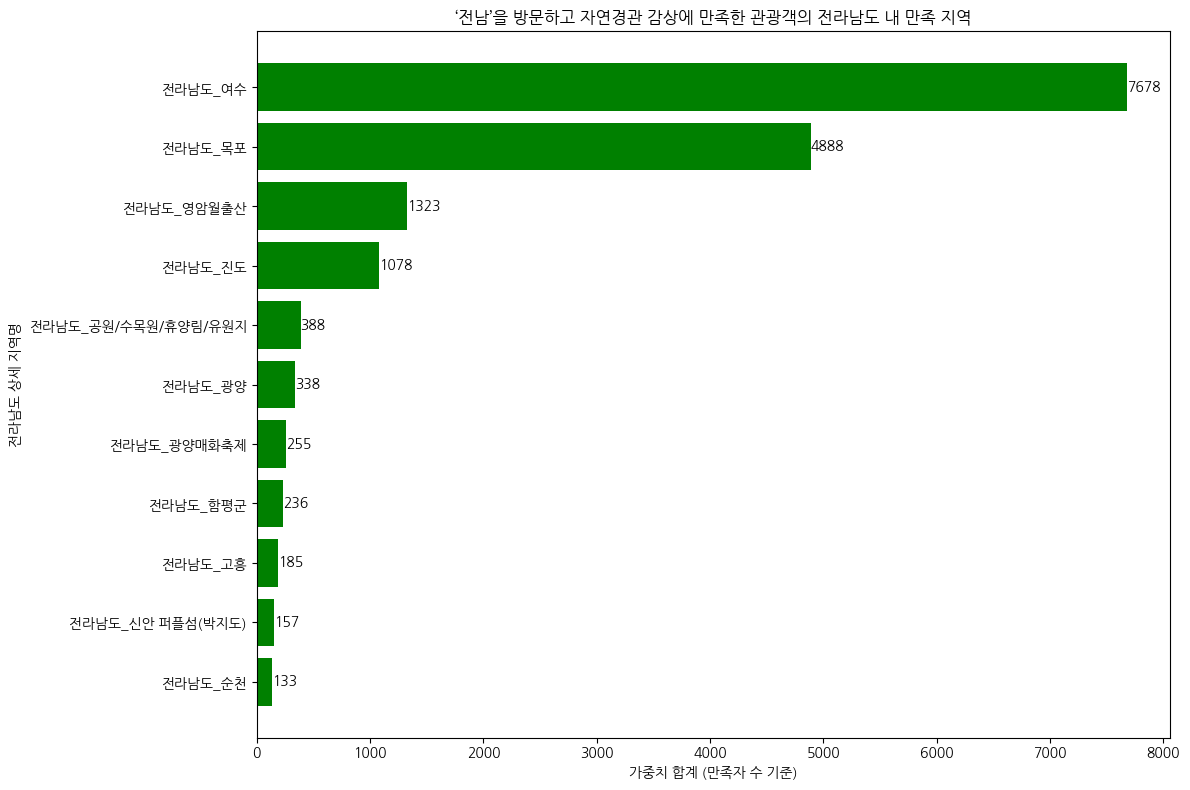

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "자연경관 감상"

# 전라남도 지역 코드-지명 매핑
jeonnam_code_map = {
    46001: "전라남도_신안 퍼플섬(박지도)",
    46002: "전라남도_대한다원보성녹차밭",
    46003: "전라남도_순천만국가정원",
    46004: "전라남도_소노캄 여수",
    46005: "전라남도_순천만국제정원박람회",
    46006: "전라남도_영암월출산",
    46301: "전라남도_광양매화축제",
    46020: "전라남도_진도 신비의바닷길",
    46031: "전라남도_순천 송광사",
    46041: "전라남도_목포 유달산",
    46051: "전라남도_구례 사성암",
    46052: "전라남도_순천만국가정원",
    46071: "전라남도_여수 유월드 루지테마파크",
    46501: "전라남도_목포",
    46502: "전라남도_여수",
    46503: "전라남도_고흥",
    46504: "전라남도_구례",
    46505: "전라남도_나주",
    46506: "전라남도_곡성",
    46507: "전라남도_담양",
    46508: "전라남도_순천",
    46509: "전라남도_진도",
    46510: "전라남도_영천",
    46511: "전라남도_광양",
    46512: "전라남도_보성군",
    46513: "전라남도_신안군",
    46514: "전라남도_함평군",
    46515: "전라남도_무안군",
    46901: "전라남도_맛집/카페/주점",
    46902: "전라남도_숙박시설(호텔,팬션,캠핑)",
    46903: "전라남도_쇼핑시설(백화점,마트,면세점)",
    46904: "전라남도_전통시장",
    46905: "전라남도_체험마을(한옥,농원,꽃)",
    46906: "전라남도_종교시설(사찰,교회)",
    46907: "전라남도_교육기관(학교,학원)",
    46908: "전라남도_뷰티,스파시설(미용,마사지,스파,찜질방)",
    46909: "전라남도_오락시설(노래방,PC방,카지노)",
    46910: "전라남도_유적지/문화재",
    46911: "전라남도_바다(해수욕장,항구)",
    46912: "전라남도_역/터미널/공항",
    46913: "전라남도_동물원/식물원/아쿠아리움",
    46914: "전라남도_놀이시설/테마공원",
    46915: "전라남도_문화시설(영화관 등)",
    46916: "전라남도_전시관/박물관/미술관",
    46917: "전라남도_레져스포츠(스키,낚시,등산)",
    46918: "전라남도_관공서(시청,군청 등)",
    46919: "전라남도_공연장/팬미팅",
    46920: "전라남도_공원/수목원/휴양림/유원지"
    }

# 지역코드 set
jeonnam_codes = set(jeonnam_code_map.keys())

# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 조건 필터: 만족활동에 타깃 활동 포함 + 방문지역에 '전남' 포함
def contains_전남(region_list):
    return any(isinstance(val, str) and ('전남' in val or '전라남도' in val) for val in region_list)

filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_전남(x))
]

# rows 생성: 만족한 지역 중 '전라남도' 코드에 해당하는 경우만 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in jeonnam_codes:
                rows.append((val, weight))
        except:
            continue

# 집계
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)

# 코드 → 지역명으로 매핑
region_score_named = region_score.rename(index=jeonnam_code_map)

# 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(region_score_named.index, region_score_named.values, color="green")
plt.gca().invert_yaxis()
plt.title("‘전남’을 방문하고 자연경관 감상에 만족한 관광객의 전라남도 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("전라남도 상세 지역명")

# 수치 표시
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# 필터된 데이터에서 만족 지역 코드 전체 수집
codes = []
for _, row in filtered.iterrows():
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            codes.append(val)
        except:
            continue

# 가장 많이 나온 코드 Top 10
Counter(codes).most_common(10)

[(46502, 13),
 (46501, 7),
 (26500, 3),
 (41003, 2),
 (11001, 2),
 (45502, 2),
 (29500, 2),
 (26005, 1),
 (48505, 1),
 (46001, 1)]

| 지역     | ① 자연경관 시설 수 & 대표 명소                                                                                                                                 | ② 공식 관광코스 포함 여부                                                                                 | ③ 관광객 평가 및 후기                                                                                               | ④ 종합 연관성                                |
| ------ | --------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- | --------------------------------------- |
| **여수** | • 오동도, 돌산공원, 해상 케이블카, 비렁길, 가사리 생태공원 등 다수의 자연명소 보유 ([트립어드바이저][1], [다음][2])                                                                           | 공식 관광코스 대부분에 포함됨 (“돌산공원”, “케이블카→오동도” 등) ([다음][2], [Brunch Story][3])                            | 벚꽃·단풍·바다 전망 높은 만족도 (“인생샷 명소”, “야경·노을 최고”) ([다음][2], [트립닷컴][4])                                              | 🟢 매우 높음 – 자연경관이 여수 관광의 핵심 요소로 자리 잡고 있음 |
| **목포** | • 유달산, 갓바위, 스카이워크, 외달도, 노적봉예술공원 등 자연+공원형 명소 ([트립어드바이저][5], [youth.mokpo.go.kr][6], [트립닷컴][7])                                                       | 시내 관광 코스에서 주로 포함 (“유달산 일몰·야경”, “갓바위”) ([youth.mokpo.go.kr][6], [Korea Tourism Organization][8]) | “바다·산 조화” 매력, 케이블카 통해 자연 조망 가능 ([여기어때][9], [트립닷컴][7])                                                       | 🟢 매우 높음 – 자연경관이 목포 관광의 필수 요소이며 매우 긍정적  |
| **진도** | • 진도대교·세방낙조전망대, 국립자연휴양림, 첨찰산, 해안도로 등 풍부 ([트립어드바이저][10], [아던트뉴스][11], [Brunch Story][12], [트립어드바이저][13])                                             | 지역 관광지 추천 리스트 대부분에 자연경관 포함됨 ([아던트뉴스][11], [Brunch Story][12])                                   | “일몰·전망대 최고”, “힐링 자연” 평가 다수 ([Brunch Story][12], [행복의 유효시간은 지금][14])                                         | 🟢 높음 – 자연감상이 진도의 중요한 관광 축을 구성          |
| **광양** | • 구봉산 전망대, 섬진강·망덕포구·백운산휴양림·만성리 갯바위 등 ([감동시대 따뜻한광양][15], [Korea Tourism Organization][16], [Korea Tourism Organization][17], [초원시원][18], [잡포스트][19]) | “1박 2일 코스”, 관광지 리스트에 자연포인트 포함됨 ([Korea Tourism Organization][16], [잡포스트][19], [트립닷컴][20])       | 높은 풍경 만족도 (“전망 좋은 조망권”, “갯바위 절경”) ([Korea Tourism Organization][16], [초원시원][18])                            | 🟢 높음 – 힐링·자연 중심 체험이 광양 여행의 핵심          |
| **함평** | • 자연생태공원, 엑스포공원, 돌머리해수욕장, 양서파충류공원 ([함평군청][21], [투어코리아][22], [트립어드바이저][23], [CT 저널][24], [마루의계절][25])                                                | 공식 가볼만한 곳에 포함(Tripadvisor 등), 축제 시기 관광코스 활용 ([투어코리아][22], [트립어드바이저][23], [마루의계절][25])           | 생태공원 및 해양절경에 대한 긍정 평가 ([투어코리아][22], [CT 저널][24])                                                            | 🟡 중간\~높음 – 생태 위주 자연 감상이 인기층에게 도드라짐     |
| **고흥** | • 다도해 국립공원, 연홍도, 팔영산 휴양림, 쑥섬, 편백숲, 해돋이 명소 ([Korea Tourism Organization][26], [트립어드바이저][27], [Zum 허브][28], [My Space][29], [테마여행][30], [다음][31])     | 권역 관광개발 계획에 자연 관광 중심                                                                            | “힐링·치유 공간”, “숨은 명소”로 긍정적 리뷰 다수 ([Korea Tourism Organization][26], [Zum 허브][28], [My Space][29], [테마여행][30]) | 🟢 높음 – 자연기반 관광 전략으로 추진 중이며 강한 관련성      |
| **순천** | • 순천만·갯벌, 순천만국가정원, 순천자연휴양림 등 대표 명소 ([scbay.suncheon.go.kr][32], [초원시원][33], [scbay.suncheon.go.kr][34], [suncheon.foresttrip.go.kr][35])            | 공식 관광코스 중심에 위치 (“갯벌·정원” 중심) ([초원시원][33], [트립닷컴][20])                                            | 희귀조류·일몰 풍경 “장관”, “힐링” 평가 매우 높음 ([scbay.suncheon.go.kr][34], [초원시원][33])                                     | 🟢 매우 높음 – 자연 감상이 순천 관광의 핵심 축           |

[1]: https://www.tripadvisor.co.kr/Attractions-g1074108-Activities-Yeosu_Jeollanam_do.html?utm_source=chatgpt.com "여수 관광명소 BEST 10 - Tripadvisor - 트립어드바이저"
[2]: https://v.daum.net/v/Gy9TCnaVny?f=p&utm_source=chatgpt.com "\"도심 속 힐링 여행!\"…여수에서 걸어보는 최고의 여행지 4곳 - Daum"
[3]: https://brunch.co.kr/%40%40aKRc/24?utm_source=chatgpt.com "여수 가볼만한 곳 BEST 10 필수코스 총정리 - 브런치"
[4]: https://kr.trip.com/travel-guide/attraction/yeosu-14786/tourist-attractions/type-natural-scenery-71-296?utm_source=chatgpt.com "여수 관광지 (2025년 업데이트) | Trip.com 추천"
[5]: https://www.tripadvisor.co.kr/Attractions-g1074117-Activities-c57-Mokpo_Jeollanam_do.html?utm_source=chatgpt.com "목포 공원 / 자연명소 BEST 5 - Tripadvisor - 트립어드바이저"
[6]: https://youth.mokpo.go.kr/tour/tourguide/mokpocourse?idx=158&mode=view&order=like&page=1&utm_source=chatgpt.com "- 목포문화관광"
[7]: https://kr.trip.com/travel-guide/attraction/mokpo-14785/tourist-attractions/type-natural-scenery-71-296?utm_source=chatgpt.com "목포 관광지 (2025년 업데이트) | Trip.com 추천"
[8]: https://korean.visitkorea.or.kr/detail/rem_detail.do?cotid=37681394-e7a0-4c60-8873-e0ffd7a85c17&utm_source=chatgpt.com "낮과 밤이 모두 아름다운 항구 도시, 목포 여행 코스 추천! 목포 가볼 ..."
[9]: https://www.yeogi.com/content/dom-ko-mokpo-hotel-bx2-mokpo-travel-best-course-guide?srsltid=AfmBOoqe9wxZ97ejC0oX97qU8asbJ24lx7EKwHsGjob4I6T1zYUc2N7d&utm_source=chatgpt.com "목포 여행 필수 코스 | 1박 2일 목포 명소, 맛집, 숙소 가이드 - 여기어때"
[10]: https://www.tripadvisor.co.kr/Attractions-g2024841-Activities-Jindo_gun_Jeollanam_do.html?utm_source=chatgpt.com "진도 관광명소 BEST 10 - Tripadvisor - 트립어드바이저"
[11]: https://www.ardentnews.co.kr/news/articleView.html?idxno=2388&utm_source=chatgpt.com "정이 넘치는 도시, 진도 관광지 추천 BEST 5 - 아던트뉴스"
[12]: https://brunch.co.kr/%40hotelscomkr/1320?utm_source=chatgpt.com "진도 가볼만한곳 7, 아름다운 전라남도 진도 여행!"
[13]: https://www.tripadvisor.co.kr/Attractions-g2024841-Activities-c57-Jindo_gun_Jeollanam_do.html?utm_source=chatgpt.com "진도 공원 / 자연명소 BEST 10 - Tripadvisor - 트립어드바이저"
[14]: https://dailyhappyday.tistory.com/931?utm_source=chatgpt.com "[진도여행] 진도 가볼만한 곳 베스트 10"
[15]: https://gwangyang.go.kr/tour/menu.es?mid=a31201000000&utm_source=chatgpt.com "9경 | 광양에가면 : 광양시 문화관광"
[16]: https://korean.visitkorea.or.kr/detail/rem_detail.do?cotid=6668502d-4c22-4bb7-aca6-951722383922&utm_source=chatgpt.com "눈과 입이 즐거운 광양 1박 2일 여행 코스> 여행기사 | 야간관광 밤밤곡곡"
[17]: https://korean.visitkorea.or.kr/detail/rem_detail.do?cotid=19c546df-87d1-4451-8f3c-c6e1427655ac&utm_source=chatgpt.com "광양으로 떠나는 힐링 광양여행> 여행기사 | |야간관광 밤밤곡곡"
[18]: https://chdnjs5450.tistory.com/entry/%EA%B4%91%EC%96%91-%EC%97%AC%ED%96%89%EC%9D%98-%ED%95%84%EC%88%98-%EC%BD%94%EC%8A%A4-%EB%86%93%EC%B9%A0-%EC%88%98-%EC%97%86%EB%8A%94-5%EB%8C%80-%EB%AA%85%EC%86%8C-%EC%86%8C%EA%B0%9C?utm_source=chatgpt.com "광양 여행의 필수 코스, 놓칠 수 없는 5대 명소 소개 - 초원시원"
[19]: https://www.job-post.co.kr/news/articleView.html?idxno=160480&utm_source=chatgpt.com "광양 가볼만한 곳, 섬진강 자연 힐링과 광양불고기 미식 여행 코스"
[20]: https://kr.trip.com/travel-guide/attraction/gwangyang-1595505/tourist-attractions/?utm_source=chatgpt.com "광양 관광지 (2025년 업데이트) | Trip.com 추천"
[21]: https://www.hampyeong.go.kr/tour/?utm_source=chatgpt.com "함평군 문화관광"
[22]: https://www.tournews21.com/news/articleView.html?idxno=93709&utm_source=chatgpt.com "함평 가볼만한 곳, 자연과 함께하는 힐링 여행지는? - 투어코리아"
[23]: https://www.tripadvisor.co.kr/Attractions-g2024842-Activities-c57-Hampyeong_gun_Jeollanam_do.html?mcid=63709&utm_source=chatgpt.com "함평 공원 / 자연명소 BEST 5 - Tripadvisor - 트립어드바이저"
[24]: https://www.ctjournal.kr/?p=33036&utm_source=chatgpt.com "함평자연생태공원, '양서파충류생태공원' 인기 - 문화관광뉴스"
[25]: https://maruseason.tistory.com/entry/%ED%95%A8%ED%8F%89-%EA%B0%80%EB%B3%BC%EB%A7%8C%ED%95%9C%EA%B3%B3-%EC%97%AC%ED%96%89%EC%BD%94%EC%8A%A4-%EC%9D%B8%EA%B8%B0%EC%97%AC%ED%96%89%EC%A7%80-BEST-10-%EA%B4%80%EA%B4%91%EB%AA%85%EC%86%8C-%EC%B6%94%EC%B2%9C-%EC%A0%84%EB%82%A8?utm_source=chatgpt.com "함평 가볼만한곳 여행코스 인기여행지 BEST 10 관광명소 추천 (+전남)"
[26]: https://korean.visitkorea.or.kr/detail/rem_detail.do?cotid=7e14f4f5-e840-4f35-9300-a125956f2a93&utm_source=chatgpt.com "나만 알고 싶은 고흥의 섬으로 떠나는 랜선 여행> 여행기사"
[27]: https://www.tripadvisor.co.kr/Attractions-g2024826-Activities-c57-Goheung_gun_Jeollanam_do.html?utm_source=chatgpt.com "고흥 공원 / 자연명소 BEST 5 - Tripadvisor - 트립어드바이저"
[28]: https://hub.zum.com/telltrip/%EC%A1%B0%EC%9A%A9%ED%95%9C-%EA%B3%B3%EC%9D%84-%EC%B0%BE%EB%8A%94%EB%8B%A4%EB%A9%B4-%EC%97%AC%EA%B8%B0%EB%A1%9C-%ED%9E%90%EB%A7%81%EC%9D%84-%EB%8A%90%EB%81%BC%EB%8A%94-%EA%B5%AD%EB%82%B4-%EC%9E%90%EC%97%B0-%EB%AA%85%EC%86%8C-110948?utm_source=chatgpt.com "“조용한 곳을 찾는다면 여기로”... 힐링을 느끼는 국내 자연 명소"
[29]: https://juns0201.tistory.com/entry/%EC%91%A5%EC%84%AC-%EA%B3%A0%ED%9D%A5%EC%9D%98-%EC%88%A8%EC%9D%80-%EC%9E%90%EC%97%B0-%EA%B2%BD%EA%B4%80%EC%9D%84-%EC%B0%BE%EC%95%84%EC%84%9C?utm_source=chatgpt.com "쑥섬: 고흥의 숨은 자연 경관을 찾아서"
[30]: https://sjaksu.tistory.com/entry/%EC%A0%84%EB%9D%BC%EB%82%A8%EB%8F%84-%EA%B3%A0%ED%9D%A5-%EA%B0%80%EC%9D%84%EC%97%90-%EA%BC%AD-%EA%B0%80%EB%B4%90%EC%95%BC-%ED%95%A0-%EA%B3%B3-BEST-5?utm_source=chatgpt.com "전라남도 고흥 가을에 꼭 가봐야 할 곳 BEST 5 - 테마여행"
[31]: https://v.daum.net/v/20240617060218248?utm_source=chatgpt.com "[이제는 지방시대] 자연경관·먹거리 빠질게 없네… '1000만 관광 ..."
[32]: https://scbay.suncheon.go.kr/wetland/Introduce/0009/?utm_source=chatgpt.com "순천만 자연환경"
[33]: https://chdnjs5450.tistory.com/entry/%EC%88%9C%EC%B2%9C%EC%8B%9C-%EB%AA%85%EC%86%8C-%ED%83%90%EB%B0%A9-%EC%97%AD%EC%82%AC%EC%99%80-%EC%9E%90%EC%97%B0%EC%9D%98-%EC%95%84%EB%A6%84%EB%8B%A4%EC%9B%80%EC%9D%B4-%EC%96%B4%EC%9A%B0%EB%9F%AC%EC%A7%84-5%EA%B0%80%EC%A7%80-%ED%95%84%EC%88%98-%EC%8A%A4%ED%8C%9F?utm_source=chatgpt.com "순천시 명소 탐방 - 역사와 자연의 아름다움이 어우러진 5가지 필수 스팟"
[34]: https://scbay.suncheon.go.kr/wetland/Introduce/0002/0005?utm_source=chatgpt.com "순천만습지에 오신 것을 환영합니다."
[35]: https://suncheon.foresttrip.go.kr/?utm_source=chatgpt.com "순천자연휴양림"


# 세종 - 전통문화체험

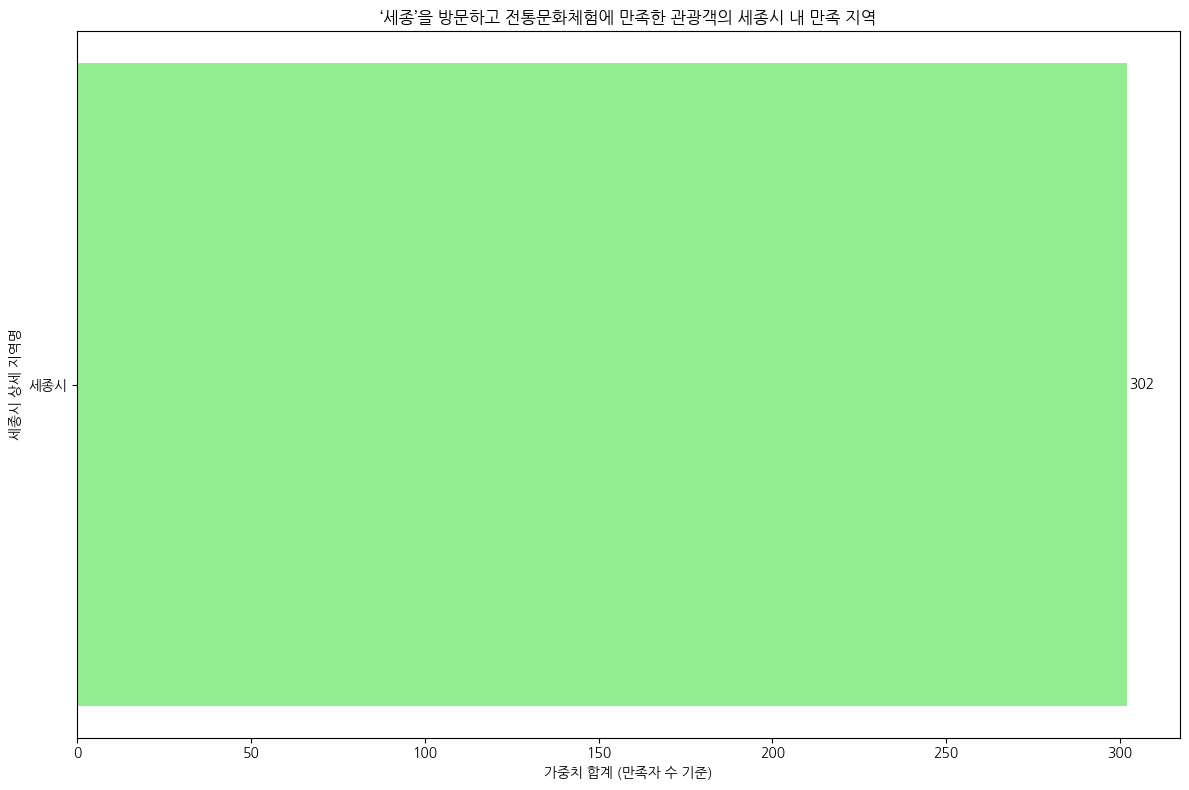

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)"

# 세종 지역 코드 매핑 (※ 필요시 추가 가능)
sejong_code_map = {
    32500: "세종시",
    32901: "세종시_맛집/카페/주점",
    32902: "세종시_숙박시설(호텔,팬션,캠핑)",
    32903: "세종시_쇼핑시설(백화점,마트,면세점)",
    32904: "세종시_전통시장",
    32905: "세종시_체험마을(한옥,농원,꽃)",
    32906: "세종시_종교시설(사찰,교회)",
    32907: "세종시_교육기관(학교,학원)",
    32908: "세종시_뷰티.스파시설(미용,마사지,스파,찜질방)",
    32909: "세종시_오락시설(노래방,PC방,카지노)",
    32910: "세종시_유적지/문화재(고궁,왕릉 등)",
    32911: "세종시_바다(해수욕장,항구)",
    32912: "세종시_역/터미널/공항",
    32913: "세종시_동물원/식물원/아쿠아리움",
    32914: "세종시_놀이시설/테마공원",
    32915: "세종시_문화시설(영화관 등)",
    32916: "세종시_전시관/박물관/미술관",
    32917: "세종시_레져스포츠(스키,낚시,등산)",
    32918: "세종시_관공서(시청,군청 등)",
    32919: "세종시_공연장/팬미팅",
    32920: "세종시_공원/수목원/휴양림/유원지",
    32921: "세종시_병원/약국/한의원",
}

# 세종 코드 목록 set
sejong_codes = set(sejong_code_map.keys())

# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 조건 필터: 만족활동에 타깃 활동 포함 + 방문지역에 '세종' 포함
def contains_세종(region_list):
    return any(isinstance(val, str) and ('세종' in val or '세종시' in val) for val in region_list)

filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_세종(x))
]

# rows 생성: 만족한 지역 중 '세종' 코드에 해당하는 경우만 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in sejong_codes:
                rows.append((val, weight))
        except:
            continue

# 집계
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)

# 코드 → 지역명으로 매핑
region_score_named = region_score.rename(index=sejong_code_map)

# 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(region_score_named.index, region_score_named.values, color="lightgreen")
plt.gca().invert_yaxis()
plt.title("‘세종’을 방문하고 전통문화체험에 만족한 관광객의 세종시 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("세종시 상세 지역명")

# 수치 표시
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# 필터된 데이터에서 만족 지역 코드 전체 수집
codes = []
for _, row in filtered.iterrows():
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            codes.append(val)
        except:
            continue

# 가장 많이 나온 코드 Top 10
Counter(codes).most_common(10)

[(42502, 1), (32500, 1), (45502, 1), (26500, 1)]

| 기준 | 내용 |
| --- | --- |
| **① 관련 시설 수 및 대표 시설** | • **세종전통문화체험관**<br>  (조치원읍, 한옥 구조체 내 전통놀이·예절·한복·전통공예 체험 등)<br>• **세종문화원** – 지역 향토문화 교육 운영<br>• **세종호수공원 내 전통정원**<br>  – 경복궁 향원정 모형, 한옥 건축 양식 공간 (체험보다는 관람 위주)<br>※ 전통공예 체험을 상설로 운영하는 시설은 수도권 대도시 대비 적은 편 |
| **② 공식 관광코스 포함 여부** | - [한국관광공사 공식 추천코스](https://korean.visitkorea.or.kr/): ‘세종시 일일관광코스’에서 전통문화체험은 부차적 소개에 그침<br>- 세종시청 관광안내 자료에서도 전통문화체험은 **중심 콘텐츠가 아닌 보조 콘텐츠로 소개됨** (자연, 가족공원 위주)<br>- **세종전통문화체험관**은 세종시 공식 홈페이지에는 등재되어 있으나, 관광 테마코스에 주력 소개되지는 않음 |
| **③ 종합 평가 (연관성 판단)** | ◽️ **보통 이하**: 세종시는 행정 중심도시로서 전통문화 관련 콘텐츠가 상대적으로 적고, 기존 체험시설도 규모가 작거나 시민 대상 프로그램 위주임<br>◽️ 체험의 연속성과 다양성 측면에서 타 지자체 **(전주, 안동 등)**에 비해 경쟁력이 낮은 편<br>→ **전통문화체험이 세종시 관광의 중심축은 아님**, 다만 교육형 가족체험 장소로 일부 활용 가능성 있음 |
